## MIIA-4203 MODELOS AVANZADOS PARA ANÁLISIS DE DATOS II
# Micro-Proyecto 1

### Profesor: Camilo Franco (c.franco31@uniandes.edu.co)

A continuación escriba los nombres de los integrantes del grupo.


Nombres:

Daniela Carolina Sanabria

Juan Camilo Marín

Jorge González

### Introducción
Una *start-up* agrícola quiere construir una aplicación online que conecte el campo
con la ciudad de manera directa y sin intermediarios. De esta manera, los agricultores ponen a la disposición de la empresa sus distintos productos, y la start-up se encarga de atender las necesidades de demanda distribuyendo los productos hasta los clientes finales en la ciudad.

Para optimizar la gestión logística y desarrollar esta labor de manera eficiente, los dueños de la *start-up* han visto la necesidad de diseñar e implementar un sistema de gestión y predicción que les permita planear con la debida anticipación la demanda esperada. Así podrán coordinar las actividades de producción, junto con los agricultores, y atender la demanda mientras se minimizan las pérdidas por unidades de producto no vendido o estropeado. 

Este es un reto altamente relevante para la sostenibilidad de la industria alimentaria, donde gran cantidad de las pérdidas se refieren a grupos alimenticios donde la frescura del producto es un importante criterio para el consumo. El desperdicio de los alimentos se relaciona con el sobre-pedido o el sobre-almacenamiento, lo cual puede a su vez ser consecuencia de dificultades en el pronóstico de la demanda. Este problema es aun más marcado a medida que uno sube en la cadena de producción y se aleja de los patrones de comportamiento del consumidor final. 

Por lo tanto, la start-up agrícola debe gestionar los inventarios de manera inteligente, disminuyendo la ventana de tiempo entre cosecha y consumo. Para ello, necesita desarrollar modelos de predicción de demanda que apoyen su operación, logrando la disponibilidad de los productos para atender a los clientes del día siguiente, minimizando los desperdicios de alimentos e identificando hábitos de consumo que le permita optimizar sus operaciones logísticas y de negocio.

### Enunciado
Por ello se le pide a usted, en calidad de consultor externo, desarrollar un modelo predictivo de demanda para los productos más relevantes con los que trabaja la start-up agrícola, obteniendo una predicción a nivel semanal (una semana adelante). Los datos los encuentra en el archivo DatosAgro.txt, donde se tiene la identificación del cliente, la fecha en que realizó el pedido, la magnitud del pedido (en unidades según lo especificado en el nombre del producto), su precio, y el código del producto agrícola que consta en el pedido.

## **1. Exploración y Visualización**



In [ ]:
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
os.listdir('/content/gdrive/My Drive/Colab Notebooks')

['1. Daniela Sanabria ps01_02_datapreparation_practice1.ipynb',
 'Datasets',
 '2. Daniela Sanabria_TreePractice.ipynb',
 '2.2 Daniela Sanabria_DT_Scikit-learn_Practice.ipynb',
 '1.1. Daniela Sanabria ps01_02_datapreparation_practice1.ipynb',
 '0. Daniela Sanabria_PythonTutorial-Basics-Lists-exercises.ipynb',
 'DatosAgro.txt']

In [ ]:
data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/DatosAgro.txt', delimiter='\t', encoding="utf8")

In [ ]:
# Importemos los datos y visualizemos la serie de tiempo
data = data.drop('Unnamed: 6', 1)
data.head()

,Cliente,Fecha,Pedido,Precio,Producto,Nombre_producto
0,Cliente26,18/09/2017,20,700,VER0049,Yerbabuena / 100 gramos
1,Cliente26,18/09/2017,10,1200,FRU0024,Limón Tahití / Libra
2,Cliente26,18/09/2017,4,1600,VER0041,Puerro / Libra
3,Cliente26,18/09/2017,10,1500,VER0038,Pimentón Rojo / Libra
4,Cliente26,18/09/2017,8,1100,VER0010,Zucchini Verde / Libra


Veamos los clientes con mayor participación en la demanda:



In [ ]:
data

,Cliente,Fecha,Pedido,Precio,Producto,Nombre_producto
0,Cliente26,18/09/2017,20,700,VER0049,Yerbabuena / 100 gramos
1,Cliente26,18/09/2017,10,1200,FRU0024,Limón Tahití / Libra
2,Cliente26,18/09/2017,4,1600,VER0041,Puerro / Libra
3,Cliente26,18/09/2017,10,1500,VER0038,Pimentón Rojo / Libra
4,Cliente26,18/09/2017,8,1100,VER0010,Zucchini Verde / Libra
...,...,...,...,...,...,...
4707,Cliente30,16/11/2016,10,3500,FRU0006,Ají Rocoto / Libra
4708,Cliente16,03/11/2016,2,6000,FRU0019,Guayaba / Libra
4709,Cliente16,03/11/2016,3,3000,GRA0011,Lenteja
4710,Cliente16,03/11/2016,10,2500,TUB0015,Arracacha


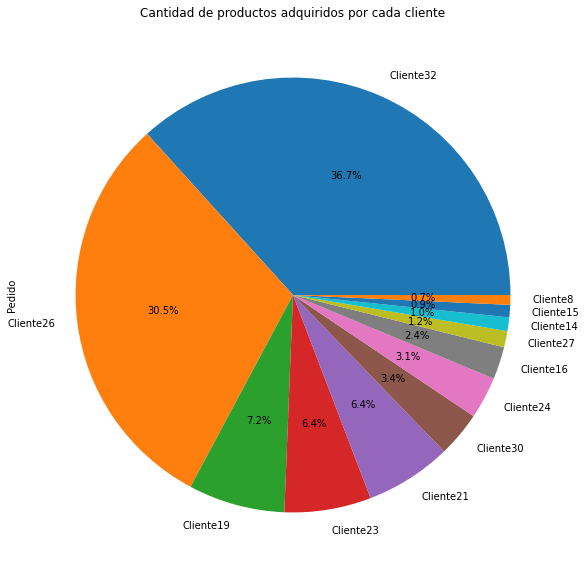

In [ ]:
cliente = pd.DataFrame(data[data['Pedido'] > 10].groupby(data["Cliente"]).sum())
cliente2 = cliente[cliente['Pedido']>50]
cliente3 = cliente2.sort_values("Pedido", ascending= False)
cliente3.plot.pie(y='Pedido', figsize=(10, 10), legend=False, autopct='%1.1f%%')
plt.title("Cantidad de productos adquiridos por cada cliente")
plt.show()

Por su parte, los productos con más volumen de pedido son los siguientes:


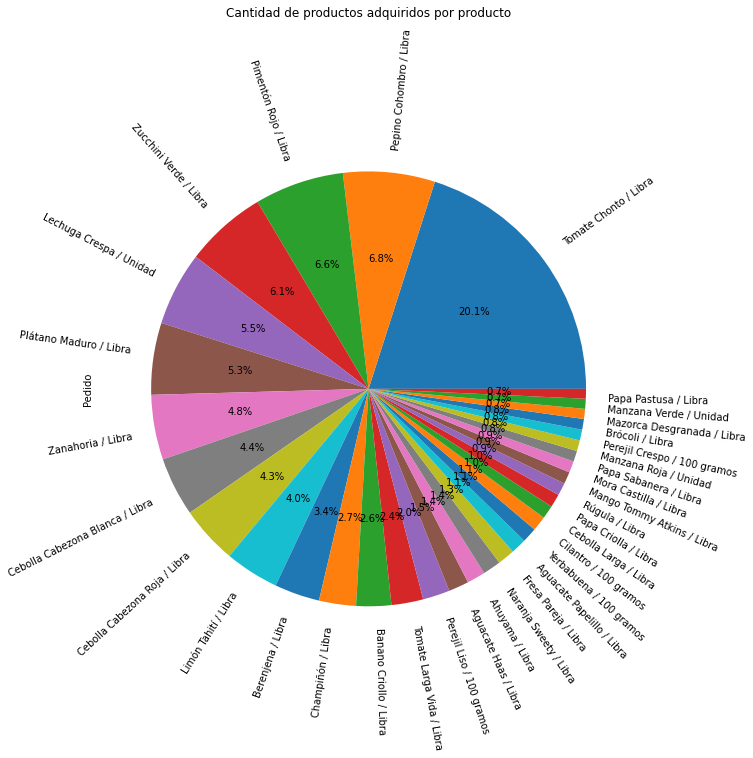

In [ ]:
productos = pd.DataFrame(data["Pedido"].groupby(data["Nombre_producto"]).sum())
productos2 = productos[productos['Pedido']>140]
productos3 = productos2.sort_values("Pedido", ascending= False)
productos3.plot.pie(y='Pedido', figsize=(10, 10), legend=False, autopct='%1.1f%%', rotatelabels=True)
plt.title("Cantidad de productos adquiridos por producto", pad=100)
plt.show()

In [ ]:
productos2

,Pedido
Nombre_producto,
Aguacate Haas / Libra,300
Aguacate Papelillo / Libra,229
Ahuyama / Libra,271
Banano Criollo / Libra,518
Berenjena / Libra,670
Brócoli / Libra,158
Cebolla Cabezona Blanca / Libra,874
Cebolla Cabezona Roja / Libra,858
Cebolla Larga / Libra,198


A continuación implemente la metodología propuesta para construir su modelo:



## **2. Preprocesamiento**

Se requiere convertir la información disponible en un DataFrame de la demanda, calculada como el número de unidades de pedido de cada producto por su tiempo, como serie de tiempo semanal. 



In [ ]:
#Se encuentran solo cuatro valores perdidos, en el nombre del cliente
data.isnull().sum()

Cliente            4
Fecha              0
Pedido             0
Precio             0
Producto           0
Nombre_producto    0
dtype: int64

In [ ]:
#Los tipos de las variables indican que es necesario ajustar el formato de la fecha
data.dtypes

Cliente            object
Fecha              object
Pedido              int64
Precio              int64
Producto           object
Nombre_producto    object
dtype: object

In [ ]:
#Se ajustan los datos de la fecha
data['Fecha2']=pd.to_datetime(data['Fecha'], dayfirst=True)

In [ ]:
#Se calcula la variable demanda, como el volumen de pedido por el precio. Esta será la variable dependiente del modelo.
data['Demanda']=data['Pedido']*data['Precio']

In [ ]:
#Se calcula la semana y el año de la fecha y se guardan estos datos en una nueva variable
#data['Semana']=data['Fecha'].dt.isocalendar().week.astype(str)+data['Fecha'].dt.year.astype(str)
data['Semana']=data['Fecha2'].dt.isocalendar().week
data['Año']=data['Fecha2'].dt.year


In [ ]:
#Se agrupan los datos por año, por semana y por nombre del producto y se ajustan de tal forma que los productos queden 
#en las columnas y la demanda esté en los valores de la tabla. De esta forma, tenemos un Data Frame en formato de serie de 
#tiempo.
df=data.groupby(['Año', 'Semana','Nombre_producto'])['Demanda'].sum().unstack(level=2)

In [ ]:
#El número total de semanas incluidas es de 46
df.shape[0]

46

In [ ]:
#La estructura de los datos es la siguiente
df.head(5)

Nombre_producto  Acelga / Libra  ...  Zucchini Verde / Libra
Año  Semana                      ...                        
2016 44                     NaN  ...                     NaN
     46                     NaN  ...                  3000.0
     47                  6400.0  ...                 25800.0
     48                   640.0  ...                 27200.0
     49                     NaN  ...                 40000.0

[5 rows x 121 columns]

Se evidencia un gran número de valores faltantes. En este caso se asumirá que significan que en esa semana no hubo un pedido de ese producto en particular. 


## **3. Identificación de productos estratégicos**

Para el modelo de predicción de la demanda se tomarán únicamente los productos más estratégicos para la compañía. Que un producto sea estratégico o no será determinado con base en el criterio de número de semanas mínimas con pedidos o, de manera equivalente, el número máximo de valores faltantes en la base de 
datos. En este caso, se estableció un número de 20 faltantes máximos. Esto quiere decir que para que un producto sea considerado estratégico debe haber registrado pedidos en almenos 26 semanas de las 46 consideradas. 

Este criterio se estableció dada la participación de este segmento en el total de las ventas de la compañía. Así pues, los productos que cumplen con esta condición explican aproximadamente el 80% del total de la demanda en el periodo considerado.


In [ ]:
#Se calcula el número de valores perdidos en cada producto.
filtro=pd.concat([df.isna().sum(), df.sum()], join='outer', axis=1)

In [ ]:
filtro.columns=['NaNs', 'Demanda']

In [ ]:
filtro=filtro.sort_values('NaNs', ascending=True).sort_values('Demanda', ascending=False)

In [ ]:
filtro.head(5)

,NaNs,Demanda
Nombre_producto,,
Tomate Chonto / Libra,1,5981700.0
Champiñón / Libra,4,4029800.0
Pimentón Rojo / Libra,5,2203150.0
Lechuga Crespa / Unidad,6,1718400.0
Zucchini Verde / Libra,8,1628100.0


In [ ]:
#Se calcula el peso de cada producto en el total de la demanda de la compañía
filtro['Importancia']=filtro['Demanda']/filtro['Demanda'].sum()

In [ ]:
#Se constanta que los productos que tienen menos de dos valores faltantes, explican aproximadamente el 80% de la demanda total en el periodo considerado
filtro[filtro['NaNs']<=20]['Importancia'].sum()

0.7959358359874431

In [ ]:
#En total, se incluirán 38 productos estatégicos en el modelo
filtro[filtro['NaNs']<=20].shape[0]

38

In [ ]:
selecionados = filtro[filtro['NaNs']<=20].index
selecionados

Index(['Tomate Chonto / Libra', 'Champiñón / Libra', 'Pimentón Rojo / Libra',
       'Lechuga Crespa / Unidad', 'Zucchini Verde / Libra',
       'Cebolla Cabezona Roja / Libra', 'Pepino Cohombro / Libra',
       'Cebolla Cabezona Blanca / Libra', 'Zanahoria / Libra',
       'Limón Tahití / Libra', 'Berenjena / Libra',
       'Perejil Crespo / 100 gramos', 'Tomate Larga Vida / Libra',
       'Banano Criollo / Libra', 'Aguacate Papelillo / Libra',
       'Fresa Pareja / Libra', 'Rúgula / Libra', 'Piña Golden Sweet / Unidad',
       'Perejil Liso / 100 gramos', 'Mora Castilla / Libra',
       'Mango Tommy Atkins / Libra', 'Brócoli / Libra', 'Papa Criolla / Libra',
       'Cebolla Larga / Libra', 'Papaya Melona / Unidad', 'Espinaca / Libra',
       'Melón / Unidad', 'Papa Sabanera / Libra', 'Naranja Sweety / Libra',
       'Habichuela / Libra', 'Ahuyama / Libra', 'Apio / Libra', 'Lulo / Libra',
       'Yerbabuena / 100 gramos', 'Papa Pastusa / Libra', 'Maracuyá / Libra',
       'Cilantro /

In [ ]:
#Se reemplazarán los valores faltantes con ceros
df.fillna(0 , inplace=True) 

In [ ]:
#Se filtran los datos con los productos seleccionados
productos_selec   = df.loc[: ,  selecionados]

In [ ]:
productos_selec.shape

(46, 38)

## **4. Modelos de predicción de la demanda**

Se estimarán diferentes modelos de redes neuronales para la demanda semanal de cada uno de los productos estratégicos seleccionados. 

Referencias utilizadas: https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/



### **4.1. Modelo LSTM**



In [ ]:
import keras
from keras import layers
from keras.models import load_model, Sequential
from keras.layers import LSTM
from keras.layers import  Dense
import h5py
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error
import statistics
from keras.layers import Bidirectional

In [ ]:
#La función split_sequences() dividirá parelalamente la serie de tiempo univariada en múltiples muestras donde cada muestra tiene un número específico de pasos (n_steps) en una fila
# y el output es un solo paso en el tiempo. En este caso los pasos se miden en semanas. 

from numpy import hstack
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [ ]:
np.random.seed(3)
#Se escalarán los datos y se dividirán entre entrenamineto y prueba, utilizando la función anterior.
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error
import statistics
from keras.layers import Bidirectional
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit_transform(productos_selec)
dataset = scaler.fit_transform(productos_selec)
# split into train and test sets
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:] 
#Tener las muestras originales 
look_back = 1
trainX, trainY = split_sequences(train, look_back)
testX, testY = split_sequences(test, look_back)

# Se crea y se ajusta un modelo de redes LSTM
model = Sequential()
model.add(Bidirectional(LSTM(1000, return_sequences=True ,  input_shape=(1, 38))))
model.add(Bidirectional(LSTM(500, return_sequences=True,activation='relu')))
model.add(Bidirectional(LSTM(100,activation='relu')))
model.add(Dense(38))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=1, verbose=0)

#Se hace las predicciones
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
#y se invierten
trainPredict =  scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)

trainY =  scaler.inverse_transform(trainY)
testY = scaler.inverse_transform(testY)

#Se construye un vector con los RMSE para cada producto. 
mse_prod = []
for i  in  range(0 ,  38):
  mse_prod.append(math.sqrt(mean_squared_error(testY[:,i], testPredict[:,i])))

print(mse_prod)
error_modelo = statistics.mean(mse_prod)

[61607.18516599804, 84310.96084362909, 67218.93417102964, 24265.4282843417, 17773.12438023854, 34921.08905534301, 12810.97511606274, 128640.37409161126, 85975.05966034823, 15483.787508970452, 13826.575111891485, 8796.133614277769, 34358.59013402904, 10267.144861438768, 17416.45379145479, 8533.888241994784, 10734.79103294546, 8913.103668107395, 8422.389316987616, 5844.579493330568, 10442.32527770387, 8946.913509788823, 7252.965971646385, 11619.729094891516, 11891.192773669927, 12505.759175129375, 3579.1816173872585, 4506.222851260159, 6324.033394898531, 2806.585101410819, 10767.887430103738, 5243.343846201106, 3149.2116568915258, 4641.144888470759, 4797.092689624255, 3715.1514082918147, 3264.7197748997737, 3826.4024875475197]


In [ ]:
print("El RMSE promedio del modelo es de: "+str(error_modelo))

El RMSE promedio del modelo es de: 20510.537644574935


### **4.2 Modelo de Redes Recurrentes Simples**



In [ ]:
#La función split_sequences() dividirá parelalamente la serie de tiempo univariada en múltiples muestras donde cada muestra tiene un número específico de pasos (n_steps) en una fila
# y el output es un solo paso en el tiempo. En este caso los pasos se miden en semanas. 
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        end_ix = i + n_steps
        if end_ix > len(sequences)-1:
            break
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:
#Se establecen los tamaños de la muestra de train y de test
train_size=int(np.ceil(productos_selec.shape[0]*0.8))
test_size=productos_selec.shape[0]-train_size

#Se divide la muestra entre entrenamiento y prueba
n_steps=4
n_features=38
X_train, y_train=split_sequences(productos_selec[:train_size].values, n_steps)

In [ ]:
np.random.seed(3)

from tensorflow.keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.callbacks import EarlyStopping

# Se define el modelo
model = Sequential()
model.add(SimpleRNN(units=500, input_shape=(n_steps, n_features), activation="relu"))
model.add(Dense(500, activation='relu'))
model.add(Dense(700, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(n_features))
model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=1000, verbose=0)

In [ ]:
y_test=productos_selec[train_size:].values
y_pred=np.zeros(shape=y_test.shape)
for i in range(test_size):
    # demonstrate prediction
    iterador=train_size+i
    x_input = productos_selec[train_size-n_steps+i:train_size-n_steps+4+i].values
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    #y_pred.append(yhat)
    y_pred[i]=yhat

In [ ]:
mse_prod_RNR = []
for i  in  range(0 ,  38):
  mse_prod_RNR.append(math.sqrt(mean_squared_error(y_test[:,i], y_pred[:,i])))

print(mse_prod_RNR)

[64142.25722206486, 67957.39439304352, 73742.55128336184, 30682.83210836688, 19422.383194758495, 23671.438170065318, 7456.409504276534, 133473.83214337777, 70642.91021003234, 14994.485659216563, 19436.056443117293, 6845.671268220393, 34853.0151094889, 16722.67135983391, 15891.93256089667, 8774.711800306653, 31417.990484792823, 9988.63435516606, 2645.103972841247, 6573.007424309455, 6069.699181107501, 9804.03080807621, 8617.38953068371, 13396.36534769633, 16179.103885879984, 13122.367173050412, 3201.0282107932053, 2824.7455806948296, 3992.5096623091513, 3521.8495750405677, 13273.093831367169, 5063.099304491986, 2871.6538868124676, 6118.514120704264, 4651.803087566845, 3672.8634654613384, 4335.7679877338815, 3623.7791431846626]


In [ ]:
error_modelo_2=statistics.mean(mse_prod_RNR)

In [ ]:
print("El RMSE promedio del modelo es de: "+str(error_modelo_2))

El RMSE promedio del modelo es de: 20623.025064478737


### **4.3 Modelo red convolucional LSTM**

In [ ]:
from keras.layers import Flatten
from keras.layers import ConvLSTM2D

from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error
import statistics
from keras.layers import Bidirectional
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(productos_selec)
dataset = scaler.fit_transform(productos_selec)
# split into train and test sets
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:] 
#Tener las muestras originales 
look_back = 1
trainX, trainY = split_sequences(train, look_back)
testX, testY = split_sequences(test, look_back)


# choose a number of time steps
n_steps = look_back

# reshape from [samples, timesteps] into [samples, timesteps, rows, columns, features]
n_features = 38
n_seq = 1
n_steps = 1

trainXconv = trainX.reshape((trainX.shape[0], n_seq, 1, n_steps, n_features))
testXconv  = testX.reshape((testX.shape[0], n_seq, 1, n_steps, n_features))


modelconv = Sequential()
modelconv.add(ConvLSTM2D(filters=500, kernel_size=(1,1), activation='relu', input_shape=(n_seq, 1, n_steps, n_features)))
modelconv.add(Flatten())
modelconv.add(Dense(38))
modelconv.compile(optimizer='adam', loss='mean_squared_error')
# fit model
modelconv.fit(trainXconv, trainY, epochs=500, verbose=0)



#make the predictions
trainPredictconv = modelconv.predict(trainXconv)
testPredictconv = modelconv.predict(testXconv)
# invert predictions
trainPredictconv =  scaler.inverse_transform(trainPredictconv)
testPredictconv = scaler.inverse_transform(testPredictconv)

trainY =  scaler.inverse_transform(trainY)
testY = scaler.inverse_transform(testY)

mse_prod_conv = []
for i  in  range(0 ,  38):
  mse_prod_conv.append(math.sqrt(mean_squared_error(testY[:,i], testPredictconv[:,i])))
  #print( "error " + productos_selec.columns[i] + " : "  + math.sqrt(mean_squared_error(trainY[:,i], trainPredict[:,i]))
  #print(  (math.sqrt(mean_squared_error(trainY[:,i], trainPredict[:,i])))
print(mse_prod_conv)
print( statistics.mean(mse_prod_conv))

error_modelo_conv = statistics.mean(mse_prod_conv)

[114795.25036016163, 84593.61443146545, 79437.27104425104, 32712.809359764113, 33393.436128169364, 43655.29671922129, 25034.341475703444, 121697.30498996825, 90310.22725081585, 48139.3314965427, 20964.563750206282, 39586.31725641039, 35473.79004131539, 24254.73368442831, 30392.14263737664, 9388.740866278014, 19875.74673447453, 13767.564481675427, 28939.901525382076, 9955.833715886136, 10709.057578341039, 18273.38031386073, 15024.157849856847, 15294.996312308162, 25586.783778680016, 13381.038683670904, 5070.721764181089, 7679.6751823913655, 11228.788407196123, 9255.291757303154, 12242.270519080634, 7156.302257656273, 5783.450515937845, 10851.120428491478, 4362.440306980306, 4411.049052886542, 3848.243196744793, 3822.8146955150446]
28693.415803962598


In [ ]:
print("El RMSE promedio del modelo es de: "+str(error_modelo_conv))

El RMSE promedio del modelo es de: 28693.415803962598


### **4.4 Redes Recurrentes Simples 2**



In [ ]:
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return numpy.array(dataX), numpy.array(dataY)
# semilla aleatoria para reproducibilidad
np.random.seed(7)

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit_transform(productos_selec)
dataset = scaler.fit_transform(productos_selec)
# split into train and test sets
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:] 
#Tener las muestras originales 
look_back = 3
trainX, trainY = split_sequences(train, look_back)
testX, testY = split_sequences(test, look_back)

In [ ]:
from keras.layers import TimeDistributed
from keras.layers import SimpleRNN
# create and fit the SimpleRNN
model = Sequential()

model.add(SimpleRNN(500, return_sequences=True ,  input_shape=(3, 38)))
model.add(SimpleRNN(100, return_sequences=True,activation='relu'))
model.add(SimpleRNN(80,activation='relu'))

model.add(Dense(38))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=400, batch_size=1, verbose=0)
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 3, 500)            269500    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 3, 100)            60100     
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 80)                14480     
_________________________________________________________________
dense_6 (Dense)              (None, 38)                3078      
Total params: 347,158
Trainable params: 347,158
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#make the predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict =  scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)

trainY =  scaler.inverse_transform(trainY)
testY = scaler.inverse_transform(testY)

mse_prod_RNR2 = []
for i  in  range(0 ,  38):
  mse_prod_RNR2.append(math.sqrt(mean_squared_error(testY[:,i], testPredict[:,i])))

print(mse_prod_RNR2)
print("\nMSE Promedio: ", statistics.mean(mse_prod_RNR2))

[95639.04658609809, 160774.3381885473, 74150.87164509659, 39533.254837616754, 24498.319676843108, 51602.74896979572, 16464.913960298964, 148642.49916546926, 113292.56448652792, 11877.992868891815, 9942.43141972454, 23779.855423168698, 51217.95434673943, 23577.23524629123, 24849.66542361779, 13501.984746316979, 14509.800466046641, 9838.68862818993, 4068.7742491503295, 9521.26645888269, 14748.254428770668, 17780.3439857739, 6002.335300259193, 10834.391969869701, 2129.9794637955747, 6382.249711990972, 4455.674613680429, 2570.460515625288, 3268.568608018054, 1848.0970803532057, 15594.192837517874, 8167.90722686978, 2699.454498837172, 5321.184701299424, 6231.470457864803, 4091.74768614951, 4543.501131790272, 5838.221517476254]

MSE Promedio:  27468.216908664628


In [ ]:
 error_modelo_4=statistics.mean(mse_prod_RNR2)

## **5. Conclusiones**


En términos generales, teniendo en cuenta el RMSE el mejor modelo es el de redes neuronales LSTM.


In [ ]:
pd.DataFrame(data=[error_modelo, error_modelo_2, error_modelo_conv, error_modelo_4], index=['1-LSTM', '2-Redes Recurrentes Simples', '3-Convulacionales LSTM', '4-Redes Recurrentes Simples 2'], columns=['RMSE General'])

,RMSE General
1-LSTM,20510.537645
2-Redes Recurrentes Simples,20623.025064
3-Convulacionales LSTM,28693.415804
4-Redes Recurrentes Simples 2,27468.216909


A nivel de producto, se encuentra lo siguiente:

In [ ]:
resultados=pd.DataFrame(data=[mse_prod, mse_prod_RNR, mse_prod_conv,mse_prod_RNR2], index=['1-LSTM', '2-Redes Recurrentes Simples', '3-Convulacionales LSTM', '4-Redes Recurrentes Simples 2'], columns=selecionados)

In [ ]:
resultados

Nombre_producto,Tomate Chonto / Libra,Champiñón / Libra,Pimentón Rojo / Libra,Lechuga Crespa / Unidad,Zucchini Verde / Libra,Cebolla Cabezona Roja / Libra,Pepino Cohombro / Libra,Cebolla Cabezona Blanca / Libra,Zanahoria / Libra,Limón Tahití / Libra,Berenjena / Libra,Perejil Crespo / 100 gramos,Tomate Larga Vida / Libra,Banano Criollo / Libra,Aguacate Papelillo / Libra,Fresa Pareja / Libra,Rúgula / Libra,Piña Golden Sweet / Unidad,Perejil Liso / 100 gramos,Mora Castilla / Libra,Mango Tommy Atkins / Libra,Brócoli / Libra,Papa Criolla / Libra,Cebolla Larga / Libra,Papaya Melona / Unidad,Espinaca / Libra,Melón / Unidad,Papa Sabanera / Libra,Naranja Sweety / Libra,Habichuela / Libra,Ahuyama / Libra,Apio / Libra,Lulo / Libra,Yerbabuena / 100 gramos,Papa Pastusa / Libra,Maracuyá / Libra,Cilantro / 100 gramos,Arracacha / Libra
1-LSTM,61607.185166,84310.960844,67218.934171,24265.428284,17773.124380,34921.089055,12810.975116,128640.374092,85975.059660,15483.787509,13826.575112,8796.133614,34358.590134,10267.144861,17416.453791,8533.888242,10734.791033,8913.103668,8422.389317,5844.579493,10442.325278,8946.913510,7252.965972,11619.729095,11891.192774,12505.759175,3579.181617,4506.222851,6324.033395,2806.585101,10767.887430,5243.343846,3149.211657,4641.144888,4797.092690,3715.151408,3264.719775,3826.402488
2-Redes Recurrentes Simples,64142.257222,67957.394393,73742.551283,30682.832108,19422.383195,23671.438170,7456.409504,133473.832143,70642.910210,14994.485659,19436.056443,6845.671268,34853.015109,16722.671360,15891.932561,8774.711800,31417.990485,9988.634355,2645.103973,6573.007424,6069.699181,9804.030808,8617.389531,13396.365348,16179.103886,13122.367173,3201.028211,2824.745581,3992.509662,3521.849575,13273.093831,5063.099304,2871.653887,6118.514121,4651.803088,3672.863465,4335.767988,3623.779143
3-Convulacionales LSTM,114795.250360,84593.614431,79437.271044,32712.809360,33393.436128,43655.296719,25034.341476,121697.304990,90310.227251,48139.331497,20964.563750,39586.317256,35473.790041,24254.733684,30392.142637,9388.740866,19875.746734,13767.564482,28939.901525,9955.833716,10709.057578,18273.380314,15024.157850,15294.996312,25586.783779,13381.038684,5070.721764,7679.675182,11228.788407,9255.291757,12242.270519,7156.302258,5783.450516,10851.120428,4362.440307,4411.049053,3848.243197,3822.814696
4-Redes Recurrentes Simples 2,95639.046586,160774.338189,74150.871645,39533.254838,24498.319677,51602.748970,16464.913960,148642.499165,113292.564487,11877.992869,9942.431420,23779.855423,51217.954347,23577.235246,24849.665424,13501.984746,14509.800466,9838.688628,4068.774249,9521.266459,14748.254429,17780.343986,6002.335300,10834.391970,2129.979464,6382.249712,4455.674614,2570.460516,3268.568608,1848.097080,15594.192838,8167.907227,2699.454499,5321.184701,6231.470458,4091.747686,4543.501132,5838.221517


Por producto, los mejores modelos estimados fueron los siguientes:


In [ ]:
resultados.idxmin() 

Nombre_producto
Tomate Chonto / Libra                                     1-LSTM
Champiñón / Libra                    2-Redes Recurrentes Simples
Pimentón Rojo / Libra                                     1-LSTM
Lechuga Crespa / Unidad                                   1-LSTM
Zucchini Verde / Libra                                    1-LSTM
Cebolla Cabezona Roja / Libra        2-Redes Recurrentes Simples
Pepino Cohombro / Libra              2-Redes Recurrentes Simples
Cebolla Cabezona Blanca / Libra           3-Convulacionales LSTM
Zanahoria / Libra                    2-Redes Recurrentes Simples
Limón Tahití / Libra               4-Redes Recurrentes Simples 2
Berenjena / Libra                  4-Redes Recurrentes Simples 2
Perejil Crespo / 100 gramos          2-Redes Recurrentes Simples
Tomate Larga Vida / Libra                                 1-LSTM
Banano Criollo / Libra                                    1-LSTM
Aguacate Papelillo / Libra           2-Redes Recurrentes Simples
Fresa Par